In [1]:
import pandas as pd
import numpy as np 
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Llamamos a la dataframe
df = pd.read_csv("C:/Users/lucho/Desktop/Programacion/Python/Linkedin Data Science/base_datos_2008.csv")

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
df = df.dropna(subset = ["ArrDelay"])
df = df.sample(frac = 1).head(100000)
Y = df["ArrDelay"]
X = df[["DepDelay"]]

In [3]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [5]:
# Ajustamos el modelo
regr = linear_model.LinearRegression()
regr.fit(X,Y)

LinearRegression()

In [7]:
print("Coeficientes: ", regr.coef_)

# Nos da la accuracy del modelo
Y_pred = regr.predict(X)
print("R cuadrado: ", r2_score(Y, Y_pred))

Coeficientes:  [1.02037981]
R cuadrado:  0.8601547603112499


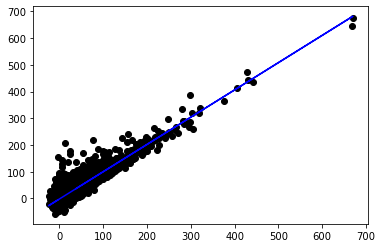

In [9]:
# Colocamos los puntos en negro y la recta de regression en color azul
plt.scatter(X[1:10000], Y[1:10000], color = "black")
plt.plot(X[1:10000], Y_pred[1:10000], color = "blue")
plt.show()

# Variables Categoricas

In [12]:
# Estas variables son numpericas las guardamos en x
X = df[["AirTime", "Distance", "TaxiIn", "TaxiOut"]]

# Los meses los tenemos que pasar a string porque no cuentan como varaibles numericas
df["Month"] = df["Month"].apply(str)
df["DayofMonth"] = df["DayofMonth"].apply(str)
df["DayOfWeek"] = df["DayOfWeek"].apply(str)

In [17]:
# Comvertimos todas las variables categoricas en dummies es una variable que toma 1 o 0 detendo la categoria que estamos usando
dummies = pd.get_dummies(data = df[["Month","DayofMonth","DayOfWeek","Origin","Dest"]])
X = dummies.add(X, fill_value = 0)

In [18]:
X.columns

Index(['AirTime', 'DayOfWeek_1', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4',
       'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7', 'DayofMonth_1',
       'DayofMonth_10',
       ...
       'Origin_VLD', 'Origin_VPS', 'Origin_WRG', 'Origin_WYS', 'Origin_XNA',
       'Origin_YAK', 'Origin_YKM', 'Origin_YUM', 'TaxiIn', 'TaxiOut'],
      dtype='object', length=649)

In [19]:
regr = linear_model.LinearRegression()
regr.fit(X,Y)

LinearRegression()

In [20]:
# Como podemos ver este modelo no es muy bueno para realizar la prediccion
Y_pred = regr.predict(X)
print("R cuadrado: ", r2_score(Y, Y_pred))

R cuadrado:  0.19280562999882533


In [29]:
X = X.add(df[["DepDelay"]], fill_value = 0)

In [30]:
regr = linear_model.LinearRegression()
regr.fit(X,Y)
# En este modelo podemos ver que es el mejor prediciendo los resultado de todos los que teniamos antes
Y_pred = regr.predict(X)
print("R cuadrado: ", r2_score(Y, Y_pred))

R cuadrado:  0.9706499538046283


In [34]:
X

,AirTime,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,DayofMonth_1,DayofMonth_10,...,Origin_VLD,Origin_VPS,Origin_WRG,Origin_WYS,Origin_XNA,Origin_YAK,Origin_YKM,Origin_YUM,TaxiIn,TaxiOut
1331403,76.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0
5346866,122.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,11.0
3455447,74.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,9.0
2286057,71.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,15.0
5179868,291.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5697590,77.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,20.0
5052592,136.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,18.0
2225872,40.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,11.0
213046,62.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,13.0
